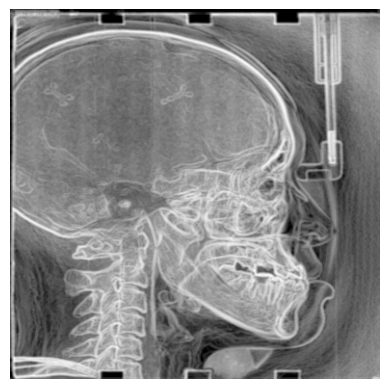

0.8833987999032292

In [1]:
%matplotlib inline
import os
# os.chdir('/home1/quanquan/code/landmark/code/tproj/test/')
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.exposure import histogram
from sklearn.metrics import mutual_info_score
# from scipy.misc import imread
import numpy as np
import cv2
# from scipy.stats import entropy
# from tutils import torchvision_save

# ----------------------
# im = cv2.imread("001.bmp", cv2.IMREAD_GRAYSCALE)
# im = im[:8, :8]
# print(im)
# print(im.shape)
# hist = histogram(im, nbins=2)
# print(hist)
# exit(0)

dirpth = "/home1/quanquan/datasets/Cephalometric/RawImage/TrainingData/"
# dirpth = "./"
im = cv2.imread(dirpth + "026.bmp", cv2.IMREAD_GRAYSCALE)
# im = cv2.imread("026.bmp", cv2.IMREAD_GRAYSCALE)
im1 = cv2.resize(im, (384,384))
im2 = cv2.resize(im, (224,224))
im3 = cv2.resize(im, (112,112))

entr_img = entropy(im, disk(10)) / 8
entr_img = cv2.resize(entr_img, (384, 384))
entr_img1 = entropy(im1, disk(10)) / 8
entr_img1 = cv2.resize(entr_img1, (384, 384))
entr_img2 = entropy(im2, disk(10)) / 8
entr_img2 = cv2.resize(entr_img2, (384, 384))
entr_img3 = entropy(im3, disk(10)) / 8
entr_img3 = cv2.resize(entr_img3, (384, 384))
# torchvision_save(torch.Tensor(entr_img), "ntr.png")


plt.imshow(entr_img, cmap='gray')
plt.axis('off')
plt.show()
entr_img.max()

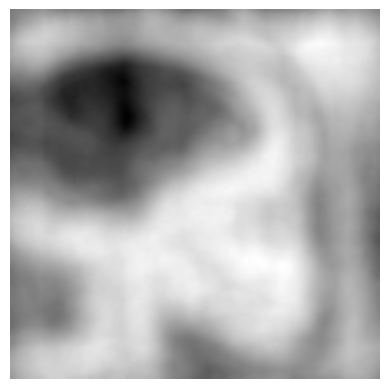

0.8833987999032292

In [2]:
plt.imshow(entr_img3, cmap='gray')
plt.axis('off')
plt.show()
entr_img.max()

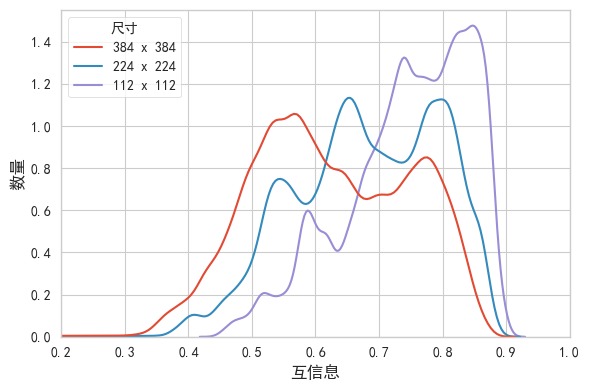

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})

plt.figure(figsize=(6,4))
# df = pd.read_csv("record_landmark_mre.csv")
data = entr_img.flatten()
df = pd.DataFrame({
    'mre': np.concatenate([entr_img1.flatten(),entr_img2.flatten(),entr_img3.flatten()]),
    '尺寸': np.concatenate([ ['384 x 384'] * len(entr_img.flatten()), ['224 x 224'] * len(entr_img.flatten()), ['112 x 112'] * len(entr_img.flatten())]),
    })
# plt.figure(figsize=(10,4))
# sns.displot(df, x='mre', color="blue", aspect=2, kind='hist', kde=True ,height=3,kde_kws={'weights': [1 / len(data)] * len(data)})
sns.kdeplot(df, x='mre', hue="尺寸")
# sns.displot(df, x='mre', color="blue", aspect=2.5, kind='kde')
# plt.title("Landmark detection")
# sns.set(rc={'figure.figsize':(11.7,4)})
plt.xlim(0.2,1)
plt.ylabel("数量",fontweight='bold')
plt.xlabel("互信息",fontweight='bold')
plt.tight_layout()
plt.savefig("iie_dist_cn.pdf")

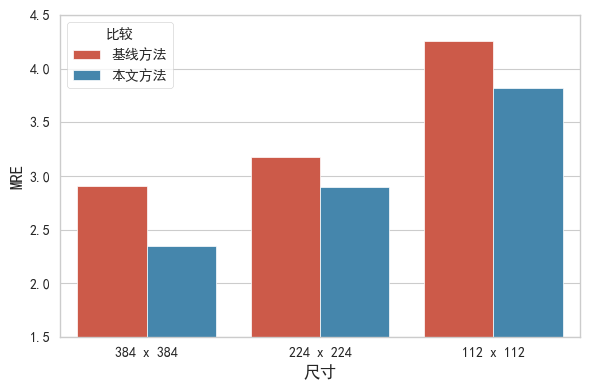

In [7]:
df = pd.DataFrame({
    "尺寸": ["384 x 384","224 x 224","112 x 112","384 x 384","224 x 224","112 x 112"],
    "mre": [2.91,3.18,4.26, 2.35,2.9,3.82],
    "比较": ["基线方法", "基线方法", "基线方法","本文方法","本文方法","本文方法", ],
})
plt.figure(figsize=(6,4))
sns.barplot(df, x="尺寸", y="mre", hue="比较")
plt.ylim(1.5,4.5)
plt.ylabel("MRE")
plt.xlabel("尺寸")
plt.tight_layout()
plt.savefig("lowres_cn.pdf")